In [1]:
from MLTSA import datasets
from matplotlib import pyplot as plt
import numpy as np

Some useful functions has been defined in ahead, set help=True for details


100%|██████████| 100/100 [00:16<00:00,  5.97it/s]


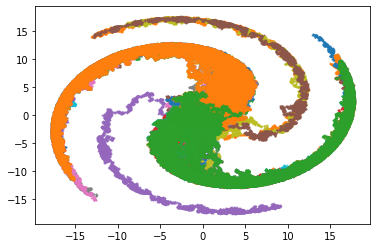

In [2]:
raw_s2 = datasets.two_d_generate_traj('s2',number=100,visual=True)
dp_s2 = datasets.two_d_data_processor('s2')
data_s2, label_s2 = datasets.two_d_data_process_full(dp_s2, raw_s2, 25, True)

In [3]:
#help(datasets.two_d_data_projector)
s2_p100 = datasets.two_d_data_projector('grid', 100)
proj_s2_X = s2_p100.batch_rotation(data_s2, "X")
proj_s2_Y = s2_p100.batch_rotation(data_s2, "Y")

The output result shape is set as (n_samples, n_features, n_steps)


In [4]:
time_frame_start = 500
time_frame_end = 1000
time_length = int(time_frame_end - time_frame_start)

In [6]:
proj_s2_X.shape

(50, 100, 10000)

In [7]:
svm_data = []
for index in range(100):
    temp_X = proj_s2_X[:,index,time_frame_start:time_frame_end].reshape(50*time_length)
    temp_Y = proj_s2_Y[:,index,time_frame_start:time_frame_end].reshape(50*time_length)
    svm_data.append([temp_X, temp_Y])
svm_data = np.array(svm_data)
svm_data.shape

(100, 2, 25000)

In [8]:
# Expand the labels
svm_label = [[i]*time_length for i in label_s2]
svm_label = np.array(svm_label)
svm_label = svm_label.reshape(50*time_length)
svm_label.shape

(25000,)

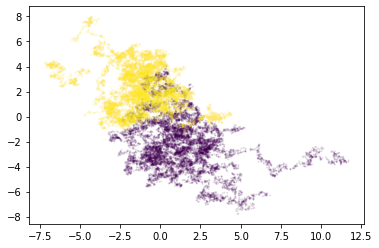

In [34]:
index = 30
plt.scatter(svm_data[index][0],svm_data[index][1], s=1, c=svm_label, alpha=0.1)

In [35]:
train_data = svm_data[index].T
train_data.shape

(25000, 2)

In [36]:
train_label = svm_label[::]
train_label.shape

(25000,)

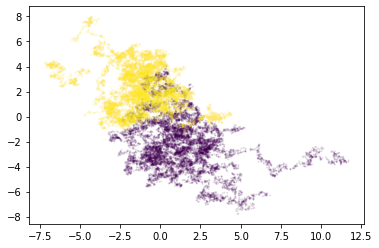

In [37]:
plt.scatter(train_data.T[0], train_data.T[1], s=1, alpha=0.1, c=train_label)

In [38]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(train_data, train_label)


SVC(kernel='linear')

In [39]:
clf.coef_

array([[-0.35222735,  0.71345738]])

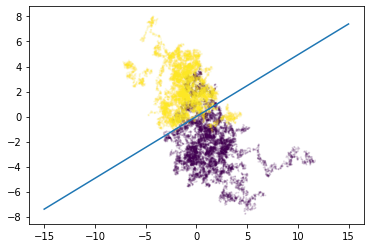

In [40]:
clf = SVC(kernel="linear")
clf.fit(train_data, train_label)

w1, w2 = clf.coef_[0]
b = clf.intercept_[0]
x = np.linspace(-15, 15, 100)
y = -w1/w2 * x - b/w2
plt.plot(x,y)
plt.scatter(train_data.T[0], train_data.T[1], s=1, alpha=0.1, c=train_label)

In [41]:
clf.score(train_data, train_label)

0.90624

/home/ucapzwe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


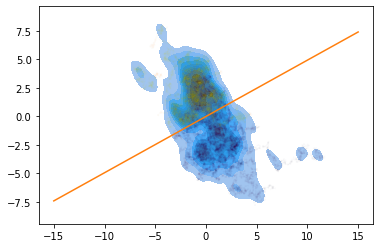

In [54]:
import seaborn as sns
sns.kdeplot(train_data.T[0], train_data.T[1], 'hex')
plt.scatter(train_data.T[0], train_data.T[1], s=1, alpha=0.01, c=train_label)
plt.plot(x,y)
plt.savefig('{}.png'.format(index))

In [108]:
# Making gif
def svm_plot(svm_data, svm_label, index, save_name, save_path):
    #-- config --#
    index = index
    #-- Data --#
    train_data = svm_data[index].T
    train_label = svm_label[::]
    #-- Train --#
    clf = SVC(kernel="linear")
    clf.fit(train_data, train_label)
    #-- Score --#
    score = clf.score(train_data, train_label)
    #-- Plot --#
    plt.cla(); # Clean all

    plt.figure(figsize=(8,6))
    w1, w2 = clf.coef_[0]
    b = clf.intercept_[0]
    x = np.linspace(-15, 15, 100)
    y = -w1/w2 * x - b/w2
    plt.plot(x,y)
    plt.scatter(train_data.T[0], train_data.T[1], s=1, alpha=0.1, c=train_label)
    plt.title("{}".format(save_name))
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    plt.gca().set_aspect(1)
    #-- Save the Plot --#
    plt.savefig(save_path+"/{}.png".format(save_name))
    plt.close()


In [82]:
from tqdm import tqdm

100%|██████████| 100/100 [14:20<00:00,  8.60s/it]


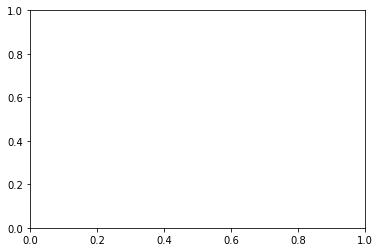

In [91]:
for index in tqdm(range(100)):
    svm_plot(svm_data, svm_label, index, "plots")

In [92]:
import os
import imageio

path = '/home/ucapzwe/generate_data/MLTSA_Dev/MLTSA/MLTSA/MLTSA_datasets/TwoD_pot/plots'
pic_lst = os.listdir(path)
pic_lst.sort(key = lambda x: int(x[:-4]))
gif_images = []
for name in pic_lst:
    filename = os.path.join(path, name)
    gif_images.append(imageio.imread(filename))  # 读取图片

imageio.mimsave('test.gif', gif_images, 'GIF', duration=0.5)

/tmp/ipykernel_566157/2775057304.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(filename))  # 读取图片


100%|██████████| 50/50 [00:08<00:00,  6.14it/s]


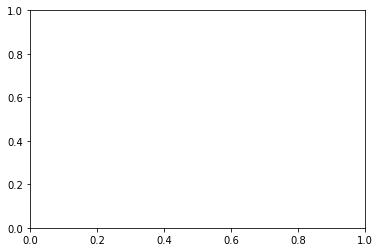

In [116]:
# Fix Period
for start in tqdm(range(0,5000,100)):
    # Time Config
    index = 0
    period = 50
    end = start + period
    # Get data
    svm_data = []
    for index in range(100):
        temp_X = proj_s2_X[:,index,start:end].reshape(50*period)
        temp_Y = proj_s2_Y[:,index,start:end].reshape(50*period)
        svm_data.append([temp_X, temp_Y])
    svm_data = np.array(svm_data)
    # Expand the labels
    svm_label = [[i]*period for i in label_s2]
    svm_label = np.array(svm_label)
    svm_label = svm_label.reshape(50*period)
    # Plot
    svm_plot(svm_data, svm_label, 0, start, "plots2")

In [117]:
path = '/home/ucapzwe/generate_data/MLTSA_Dev/MLTSA/MLTSA/MLTSA_datasets/TwoD_pot/plots2'
pic_lst = os.listdir(path)
pic_lst.sort(key = lambda x: int(x[:-4]))
gif_images = []
for name in pic_lst:
    filename = os.path.join(path, name)
    gif_images.append(imageio.imread(filename))  # 读取图片

imageio.mimsave('test2.gif', gif_images, 'GIF', duration=0.5)

/tmp/ipykernel_566157/1513895988.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(filename))  # 读取图片


100%|██████████| 40/40 [33:41<00:00, 50.54s/it] 


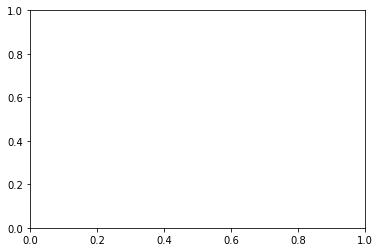

In [115]:
# Fix Start
for end in tqdm(range(50,2050,50)):
    # Time Config
    start = 0
    period = end - start
    
    # Get data
    svm_data = []
    for index in range(100):
        temp_X = proj_s2_X[:,index,start:end].reshape(50*period)
        temp_Y = proj_s2_Y[:,index,start:end].reshape(50*period)
        svm_data.append([temp_X, temp_Y])
    svm_data = np.array(svm_data)
    # Expand the labels
    svm_label = [[i]*period for i in label_s2]
    svm_label = np.array(svm_label)
    svm_label = svm_label.reshape(50*period)
    # Plot
    svm_plot(svm_data, svm_label, 0, end, "plots3")

In [118]:
path = '/home/ucapzwe/generate_data/MLTSA_Dev/MLTSA/MLTSA/MLTSA_datasets/TwoD_pot/plots3'
pic_lst = os.listdir(path)
pic_lst.sort(key = lambda x: int(x[:-4]))
gif_images = []
for name in pic_lst:
    filename = os.path.join(path, name)
    gif_images.append(imageio.imread(filename))  # 读取图片

imageio.mimsave('test3.gif', gif_images, 'GIF', duration=0.5)

/tmp/ipykernel_566157/1321790443.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(filename))  # 读取图片
